In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#librairies pour la CAH 
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

%matplotlib inline

import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [47]:
data = pd.read_csv("/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv")


In [48]:
del  data['Invoice ID']
data = data.drop('Date',axis=1)
data = data.drop('Gender',axis=1)
data = data.drop('Payment',axis=1)
data = data.drop('Time',axis=1)
data = data.drop('gross margin percentage',axis=1)
data = data.drop('cogs',axis=1)
data = data.drop('Branch',axis=1)
data = data.drop('City',axis=1)
data.head(1)

,Customer type,Product line,Unit price,Quantity,Tax 5%,Total,gross income,Rating
0,Member,Health and beauty,74.69,7,26.1415,548.9715,26.1415,9.1


In [49]:
df = data[["Unit price","Product line","Quantity", "Customer type", "Rating", "Total","Tax 5%","gross income"]]


In [50]:
df = pd.get_dummies(df)#convention de string en entier (0 ou 1)

In [51]:
from sklearn.preprocessing import scale #en charge la fonction de normalisation à partir de la bibliothèque sklearn
df1 = scale(df) # normaliser les données

In [52]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(df)

In [53]:
silhouette_avg = silhouette_score(df, clustering.labels_)
print("Silhouette moyenne :", silhouette_avg)


Silhouette moyenne : 0.6222932602056043


In [54]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

Z1 = linkage(df, method='ward')

# Recherche du nombre optimal de clusters
max_silhouette = -1
optimal_n_clusters = -1
for n_clusters in range(2,10):
   cluster_labels = fcluster(Z1, n_clusters, criterion='maxclust')
   silhouette_avg = silhouette_score(df, cluster_labels)
   if silhouette_avg > max_silhouette:
      max_silhouette = silhouette_avg
      optimal_n_clusters = n_clusters

print("Nombre optimal de clusters :", optimal_n_clusters)
print(" silhouette_avg :", silhouette_avg)
print(" max_silhouette :", max_silhouette)

Nombre optimal de clusters : 2
 silhouette_avg : 0.39940380402717396
 max_silhouette : 0.6222932602056043


In [55]:
print(df.shape)
df.head()

(1000, 14)


,Unit price,Quantity,Rating,Total,Tax 5%,gross income,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Customer type_Member,Customer type_Normal
0,74.69,7,9.1,548.9715,26.1415,26.1415,0,0,0,1,0,0,1,0
1,15.28,5,9.6,80.2200,3.8200,3.8200,1,0,0,0,0,0,0,1
2,46.33,7,7.4,340.5255,16.2155,16.2155,0,0,0,0,1,0,0,1
3,58.22,8,8.4,489.0480,23.2880,23.2880,0,0,0,1,0,0,1,0
4,86.31,7,5.3,634.3785,30.2085,30.2085,0,0,0,0,0,1,0,1


(array([  7.,  44.,  88., 205., 250., 204., 120.,  58.,  19.,   5.]),
 array([-2.90123013, -2.27732908, -1.65342802, -1.02952697, -0.40562591,
         0.21827514,  0.8421762 ,  1.46607725,  2.08997831,  2.71387937,
         3.33778042]),
 <BarContainer object of 10 artists>)

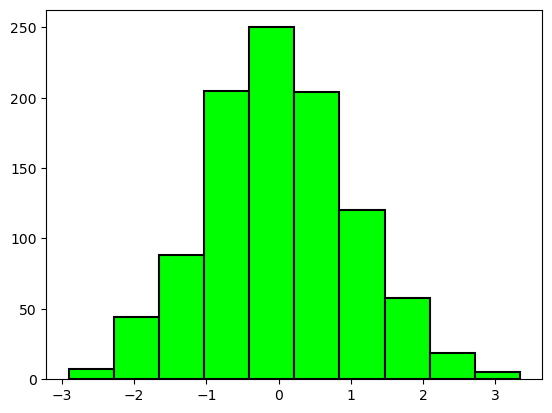

In [56]:
x = np.random.randn(1000)
plt.hist(x, color = "#00FF00", edgecolor='black', linewidth=1.5)

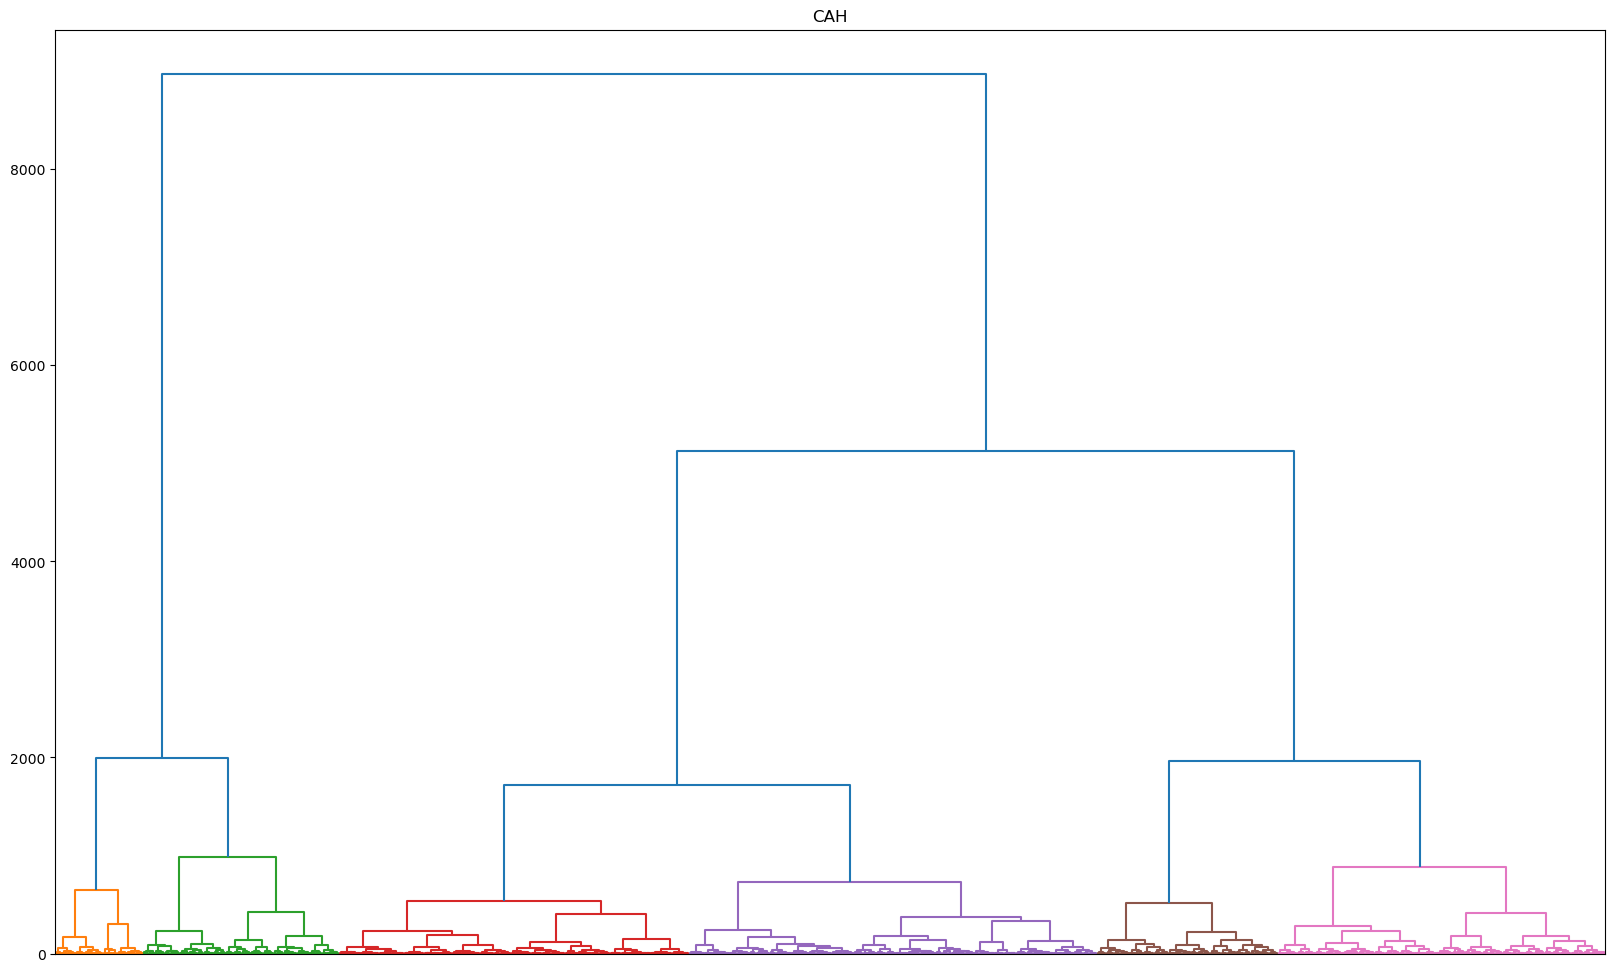

2 groupes constitués


In [57]:
#générer la matrice des liens 
Z = linkage(df,method='ward',metric='euclidean') 

# génération et affichage du dendrogramme

plt.figure(figsize=(20,12))
plt.title("CAH") 

dendrogram(Z,labels=data.index,no_labels=True,color_threshold=1200)

plt.show() 

groupes_cah = sch.fcluster(Z,t=2,criterion='maxclust') 
print(np.unique(groupes_cah).size, "groupes constitués")

In [58]:
data = data.drop('Customer type',axis=1)
data = data.drop('Total',axis=1)
data = data.drop('Rating',axis=1)
data = data.drop('Tax 5%',axis=1)
data.head(1)

,Product line,Unit price,Quantity,gross income
0,Health and beauty,74.69,7,26.1415


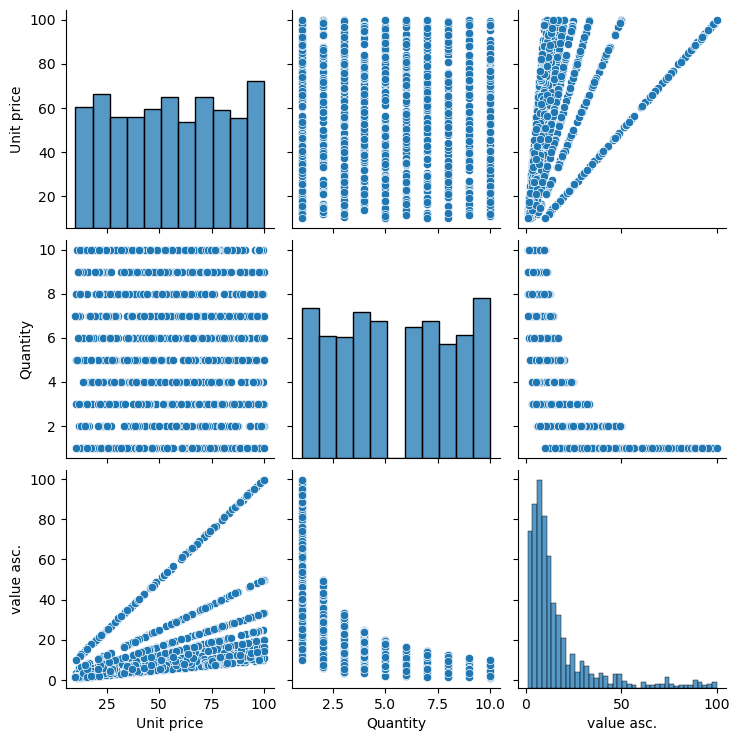

In [59]:
import seaborn as sns
data['value asc.']=data['Unit price']/data['Quantity']

sns.pairplot(data.drop('gross income',axis=1),height=2.5)
data.drop(['value asc.'],axis=1,inplace=True)

In [60]:
from sklearn.cluster import AgglomerativeClustering # CHA avec sklearn
import numpy as np

In [61]:
data = pd.get_dummies(data)#convention de string en entier

In [62]:
#Appliquer le CHA sur la donnée normalisée
clustering = AgglomerativeClustering(affinity='euclidean',  linkage='ward', n_clusters=2,).fit(data)

In [63]:
labels= clustering.labels_ # récupérer le cluster auquel été attribué  chaque client
from collections import Counter # calculer le nombre d'élèments par cluster
Counter(labels)

Counter({1: 467, 0: 533})

In [64]:
# Récupérer les indexes des élémenets de chaque cluster
label_0 = np.where(labels == 0) #récupérer les index des éléments du cluster 0 et les mettre dans label_0
label_1 = np.where(labels == 1) #récupérer les  index des éléments du cluster 1 et les mettre dans label_0
print(label_0[0].shape, label_1[0].shape  ) #afficher la taille de chaque cluster

(533,) (467,)


In [65]:
# Mettre chaque les éléments de chaque cluster dans un dataframe séparé
df_labels_0=data.iloc[label_0] #à partir du dataframe df1 récupérer les éléments ayant les index label_0
df_labels_0.describe() #afficher les statistiques du cluster 0

,Unit price,Quantity,gross income,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
count,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,34.386792,5.227017,8.671977,0.181989,0.174484,0.185741,0.148218,0.159475,0.150094
std,14.304567,2.875071,5.787191,0.386198,0.379882,0.389263,0.355649,0.366462,0.357499
min,10.080000,1.000000,0.508500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.010000,3.000000,4.035500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34.310000,5.000000,7.629000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46.470000,8.000000,12.245000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,65.650000,10.000000,24.665000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
# Mettre chaque les éléments de chaque cluster dans un dataframe séparé
df_labels_1=data.iloc[label_1] #à partir du dataframe df1 récupérer les éléments ayant les index label_1
df_labels_1.describe()#afficher les statistiques du cluster 1

,Unit price,Quantity,gross income,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
count,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000,467.000000
mean,79.965675,5.832976,23.034700,0.156317,0.182013,0.160600,0.156317,0.160600,0.184154
std,12.712475,2.947674,12.061598,0.363545,0.386269,0.367555,0.363545,0.367555,0.388026
min,51.910000,1.000000,3.249500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.150000,3.000000,13.188000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,79.910000,6.000000,23.097000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,91.020000,8.000000,32.462250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99.960000,10.000000,49.650000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
